# Learn OpenCV with Python
[opencv doc](https://docs.opencv.org/4.1.0/)


## Getting Started with Images

### 1. read a image

In [7]:
import numpy as np
import cv2 as cv

# Load an color image in grayscale
img = cv.imread('image.jpg',cv.IMREAD_GRAYSCALE)

#cv.imshow('image',img)
cv.imwrite('image-grey.jpg',img)


True

### Marking border of image

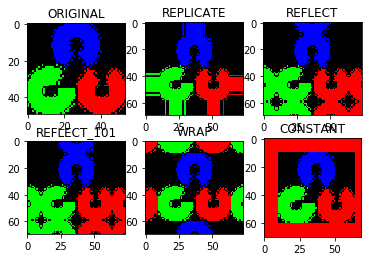

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv.imread('opencv-logo.png')
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,5,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

### image addition

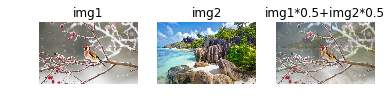

In [15]:
import cv2 as cv
from matplotlib import pyplot as plt
img1=cv.imread('bird.jpg')
img2=cv.imread('image.jpg')
dst=cv.addWeighted(img1, 0.8, img2, 0.2, 0)
#cv.imwrite('image-bird-add.jpg',dst)

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB) #opencv是BGR， 而plt是RGB，所以需要转换
plt.subplot(131), plt.imshow(img1), plt.title("img1"),plt.axis('off')#不显示坐标尺寸
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.subplot(132), plt.imshow(img2), plt.title("img2"),plt.axis('off')#不显示坐标尺寸
dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
plt.subplot(133), plt.imshow(dst), plt.title("img1*0.5+img2*0.5"),plt.axis('off')     #不显示坐标尺寸

plt.show()

## Understanding Features

很多人都玩过拼图游戏，对于人类而言，可以很容易的识别出特征，然后将一个个图像小块拼成一张完整的图像。

但是计算机却很难，因为首先计算机得找出**特征**，

opencv中有很多算法，帮助我们找出这些特征，让计算机来理解图像

### 1. Harris Corner Detection 

一张图像的边缘(corner),就是这个区域在所有方向都有很高的density。 

在1988年， Chris Harris & Mike Stephens完成了一篇论文 **A Combined Corner and Edge Detector** 用于检测边缘。

数学表达式为：

$E(u,v) = \sum_{x,y} \underbrace{w(x,y)}_\text{window function} \, [\underbrace{I(x+u,y+v)}_\text{shifted intensity}-\underbrace{I(x,y)}_\text{intensity}]^2$

实际上，数学推导我也不是特别明白。。。

但是可以直接上实例

### cv.cornerHarris实例

(<matplotlib.axes._subplots.AxesSubplot at 0x1770c1b0>,
 Text(0.5,1,u'img-harris-corner'),
 (-0.5, 1919.5, 1199.5, -0.5))

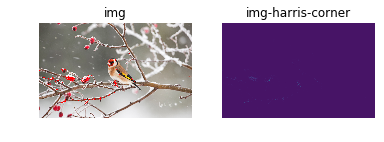

In [22]:
import numpy as np
import cv2 as cv
filename = 'bird.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
#cv.imshow('dst',img)
cv.imwrite('bird-cornerHarris.jpg', dst)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img), plt.title("img"),plt.axis('off')

plt.subplot(122), plt.imshow(dst), plt.title("img-harris-corner"),plt.axis('off')